In [1]:
import math
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
import pickle

**Q0.**

a. The program was aimed to find certain tuples from a list. The target 

tuples are those whose the first numbers are the same and the last numbers are different. 

For example, in this case, the program put (1, 3, 5) and (1, 9, 8) in a group & (0, 1, 2)
Among the selected groups of tuples, the program found the tuple whose last number is the largest, and store it in a list, which is the final result
For example, (1, 9, 8) is chosen instead of (1, 3, 5). Because (0, 1, 2) is the only tuple in its group, it is appended to the list as the final result too. 

b. When comparing tuples, it will be more efficient if comparsion is conducted only once.  In this code, (1, 3, 5) is compared with (1, 9, 8) and later (1, 9, 8) is compared to (1, 3, 5) agian, which is redundant. 

It be a good idea to modify the nested loop to make unique comparisons only once.
To reduce the number of unnecessary executation in the nested loop, we can skip some parts of the inner loop if tuples begining with numbers that have been compared. 

We can also iterate the list starting at the index in the inner loop after the outer loop, in order to reduce executation time in loops.

Another way to improve the program performance is using a different data structure, dictionary. The procedures are as following. Use a dictionary where the keys are the first digits of each number in the list. Then assign the tuple starting with the digits corresponding to the keys. Finally, look for the values with the largest numbers at the last index of tuple. 



**Q1.**

In [3]:
def random_list(n, low, high):
    #assume k = 5
    return [(np.random.randint(low, high), np.random.randint(low, high), np.random.randint(low, high), np.random.randint(low, high), np.random.randint(low, high)) for i in range(n)]
assert type(test) == list and type(test[0] == tuple), "return type is wrong"
print("The return type is a list containing tuples")

The return type is a list containing tuples


**Q2.**

In [6]:
#a.
def tuples_with_largest(input_list, same_at_ith, differ_at_jth):
    op = []
    for m in range(len(input_list)):
        li = [input_list[m]]
        for n in range(len(input_list)):
            if (input_list[m][same_at_ith] == input_list[n][same_at_ith] and input_list[m][differ_at_jth] != input_list[n][differ_at_jth]):
                li.append(input_list[n])
        op.append(sorted(li, key=lambda dd: dd[differ_at_jth], reverse=True)[0])
    res = list(set(op))
    return res

#b.
def improved(input_list, same_at_ith, largest_at_jth):
    op = []
    track = set()
    for m in range(len(input_list)):
        if input_list[m][same_at_ith] in track:
            continue #skip the inner loop if the maximum tuple has been obtained from the groups of tuples with the same number values at same_at_ith
        li = [input_list[m]]
        for n in range(len(input_list)):
            if (input_list[m][same_at_ith] == input_list[n][same_at_ith] and input_list[m][largest_at_jth] != input_list[n][largest_at_jth]):
                li.append(input_list[n])
        op.append(sorted(li, key=lambda dd: dd[largest_at_jth], reverse=True)[0])
        track.add(sorted(li, key=lambda dd: dd[largest_at_jth], reverse=True)[0][0]) #record the groups of tuples whose maximum has been obtained
    res = list(set(op))
    return res

#c.
def scratch(input_list, same_at_ith, largest_at_jth):
    #find the set of unique numbers at ith of the tuples in the sample list
    #put the unique numbers as the key values in a dictionary 
    unique_ith_number_sample = {}
    for i in range(len(input_list)):
        unique_ith_number_sample[input_list[i][same_at_ith]] = []

    #obtain the tuples from the list that have the same numbers from the set at the i-th positions    
    for i in input_list:
        ith_number = i[same_at_ith] #int
        lst = unique_ith_number_sample[ith_number] + [i]
        unique_ith_number_sample[ith_number] = lst

    #from the dictionary, for each value corresponding to the keys, find the tuples that have the largest number at "largest_at_jth"
    result = []
    for i in unique_ith_number_sample.keys():
        lst = unique_ith_number_sample.get(i)

        max_at_jth = -math.inf
        max_tuple = ()
        for j in lst:
            if j[largest_at_jth] > max_at_jth:
                max_at_jth = j[largest_at_jth]
                max_tuple = j

        result.append(max_tuple)
    return result

#Some testing
test_list = random_list(5, 0, 50)
test1 = tuples_with_largest(test_list, 0, 3)
test2 = improved(test_list, 0, 4)
test3 = scratch(test_list, 0, 4)
print(test1)
print(test2)
print(test3)


[(48, 10, 41, 26, 5), (30, 25, 9, 13, 42), (16, 14, 44, 7, 7), (39, 14, 17, 24, 39), (12, 14, 42, 44, 7)]
[(48, 10, 41, 26, 5), (30, 25, 9, 13, 42), (16, 14, 44, 7, 7), (39, 14, 17, 24, 39), (12, 14, 42, 44, 7)]
[(30, 25, 9, 13, 42), (48, 10, 41, 26, 5), (39, 14, 17, 24, 39), (16, 14, 44, 7, 7), (12, 14, 42, 44, 7)]


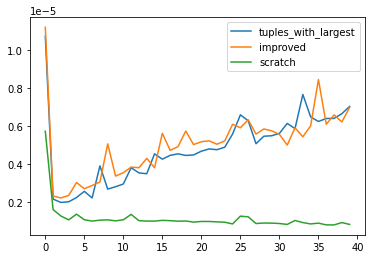

In [13]:
#d.
run_time_a = []
run_time_b = []
run_time_c = [] 
for i in range(1, 41):
    test_list = random_list(i, 0, 200)

    start = time.time()
    test1 = tuples_with_largest(test_list, 0, 4)
    end = time.time()
    run_time_a.append((end - start)/(i+1))

    start = time.time()
    test2 = improved(test_list, 0, 4)
    end = time.time()
    run_time_b.append((end - start)/(i+1))

    start = time.time()
    test3 = scratch(test_list, 0, 4)
    end = time.time()
    run_time_c.append((end - start)/(i+1))

plt.plot(run_time_a, label = "tuples_with_largest")
plt.plot(run_time_b, label = "improved")
plt.plot(run_time_c, label = "scratch")
plt.legend()
plt.show()

**Q3.**

In [24]:
#a. 
data11_12 = pd.read_sas("/DEMO_G.XPT")
data13_14 = pd.read_sas("/DEMO_H.XPT")
data15_16 = pd.read_sas("/DEMO_I.XPT")
data17_18 = pd.read_sas("/DEMO_J.XPT")

#Add an id to each cohort 
data11_12["Cohort_ID"] = [1 for i in range(data11_12.shape[0])]
data13_14["Cohort_ID"] = [2 for i in range(data13_14.shape[0])]
data15_16["Cohort_ID"] = [3 for i in range(data15_16.shape[0])]
data17_18["Cohort_ID"] = [4 for i in range(data17_18.shape[0])]

data1 = data11_12[["SEQN", "RIDAGEYR", "RIDRETH3", "DMDEDUC2", "DMDMARTL", "RIDSTATR", "SDMVPSU", "SDMVSTRA", "WTMEC2YR", "WTINT2YR", "Cohort_ID"]] 
data2 = data13_14[["SEQN", "RIDAGEYR", "RIDRETH3", "DMDEDUC2", "DMDMARTL", "RIDSTATR", "SDMVPSU", "SDMVSTRA", "WTMEC2YR", "WTINT2YR", "Cohort_ID"]] 
data3 = data15_16[["SEQN", "RIDAGEYR", "RIDRETH3", "DMDEDUC2", "DMDMARTL", "RIDSTATR", "SDMVPSU", "SDMVSTRA", "WTMEC2YR", "WTINT2YR", "Cohort_ID"]] 
data4 = data17_18[["SEQN", "RIDAGEYR", "RIDRETH3", "DMDEDUC2", "DMDMARTL", "RIDSTATR", "SDMVPSU", "SDMVSTRA", "WTMEC2YR", "WTINT2YR", "Cohort_ID"]]

#append 
frame = [data1, data2, data3, data4]
data_selected = pd.concat(frame)

#rename the columns 
data_selected = data_selected.rename(columns = {"SEQN": "respondent sequence number", "RIDAGEYR": "age in years at screening", "RIDRETH3": "race/hispanic origin w/ nh asian", "DMDEDUC2": "education level - adults 20+", "DMDMARTL": "marital status", "RIDSTATR": "interview/examination status", "SDMVPSU": "masked variance pseudo-PSU", "SDMVSTRA": "masked variance pseudo-stratum", "WTMEC2YR": "full sample 2 year mec exam weight", "WTINT2YR": "full sample 2 year interview weight"})

#replace NaN with -1
data_selected = data_selected.fillna(-1)

#convert the data structure type in each column
convert_data = {}
for i in data_selected.columns:
    if i != "WTMEC2YR" and i != "WTINT2YR":
        convert_data[i] = int

data_selected = data_selected.round(2) #to round WTMEC2YR and WTINT2YR to two decimal digits 
data_selected = data_selected.astype(convert_data)

#serialize the data with pickle
serial_data = pickle.dumps(data_selected)
pickle.loads(serial_data)

,respondent sequence number,age in years at screening,race/hispanic origin w/ nh asian,education level - adults 20+,marital status,interview/examination status,masked variance pseudo-PSU,masked variance pseudo-stratum,full sample 2 year mec exam weight,full sample 2 year interview weight,Cohort_ID
0,62161,22,3,3,5,2,1,91,104236,102641,1
1,62162,3,1,-1,-1,2,3,92,16116,15457,1
2,62163,14,6,-1,-1,2,3,90,7869,7397,1
3,62164,44,3,4,1,2,1,94,127965,127351,1
4,62165,14,4,-1,-1,2,2,90,13384,12209,1
...,...,...,...,...,...,...,...,...,...,...,...
9249,102952,70,6,3,1,2,2,138,18338,16896,4
9250,102953,42,1,3,4,2,2,137,63661,61630,4
9251,102954,41,4,5,5,2,1,144,17694,17160,4
9252,102955,14,4,-1,-1,2,1,136,14871,14238,4


In [34]:
#b. 
data11_12_oral = pd.read_sas("/OHXDEN_G.XPT")
data13_14_oral = pd.read_sas("/OHXDEN_H.XPT")
data15_16_oral = pd.read_sas("/OHXDEN_I.XPT")
data17_18_oral = pd.read_sas("/OHXDEN_J.XPT")

#Add an id to each cohort 
data11_12_oral["Cohort_ID"] = [1 for i in range(data11_12_oral.shape[0])]
data13_14_oral["Cohort_ID"] = [2 for i in range(data13_14_oral.shape[0])]
data15_16_oral["Cohort_ID"] = [3 for i in range(data15_16_oral.shape[0])]
data17_18_oral["Cohort_ID"] = [4 for i in range(data17_18_oral.shape[0])]

#Obtain the column names
column_names = ["SEQN", "OHDDESTS"]
for i in range(1, 33):
    if i < 10:
        temp = "OHX0" + str(i) + "TC"
        column_names.append(temp)
    else:
        temp = "OHX" + str(i) + "TC"
        column_names.append(temp)

for i in range(2, 32):
    if i != 17 and i != 16:
        if i < 10:
            temp = "OHX0" + str(i) + "CTC"
            column_names.append(temp)
        else:
            temp = "OHX" + str(i) + "CTC"
            column_names.append(temp)

#extract columns from data        
data1_oral = data11_12_oral[column_names] 
data2_oral = data13_14_oral[column_names] 
data3_oral = data15_16_oral[column_names] 
data4_oral = data17_18_oral[column_names] 

#append 
frame_oral = [data1_oral, data2_oral, data3_oral, data4_oral]
data_selected_oral = pd.concat(frame_oral)

#rename the column names
data_selected_oral = data_selected_oral.rename(columns = {"OHX01TC": "Tooth Count: Upper right 3rd molar (3M)",
                                                         "OHX02TC": "Tooth Count: Upper right 2nd molar (2M)",
                                                         "OHX03TC": "Tooth Count: Upper right 1st molar (1M)",
                                                         "OHX04TC": "Tooth Count: Upper right 2nd bicuspid/2nd primary molar (2B)",
                                                         "OHX05TC": "Tooth Count: Upper right 1st bicuspid/1st primary molar (1B)",
                                                         "OHX06TC": "Tooth Count: Upper right cuspid (C)",
                                                         "OHX07TC": "Tooth Count: Upper right lateral incisor (LI)",
                                                         "OHX08TC": "Tooth Count: Upper right central incisor (CI)",
                                                         "OHX09TC": "Tooth Count: Upper left central incisor (CI)",
                                                         "OHX10TC": "Tooth Count: Upper left lateral incisor (LI)",
                                                         "OHX11TC": "Tooth Count: Upper left cuspid (C)",
                                                         "OHX12TC": "Tooth Count: Upper left 1st bicuspid/1st primary molar (1B)",
                                                         "OHX13TC": "Tooth Count: Upper left 2nd bicuspid/2nd primary molar (2B)",
                                                         "OHX14TC": "Tooth Count: Upper left 1st molar (1M)",
                                                         "OHX15TC": "Tooth Count: Upper left 2nd molar (2M)",
                                                         "OHX16TC": "Tooth Count: Upper left 3rd molar (3M)",
                                                         "OHX17TC": "Tooth Count: Lower left 3rd molar (3M)",
                                                         "OHX18TC": "Tooth Count: Lower left 2nd molar (2M)",
                                                         "OHX19TC": "Tooth Count: Lower left 1st molar (1M)",
                                                         "OHX20TC": "Tooth Count: Lower left 2nd bicuspid/2nd primary molar (2B)",
                                                         "OHX21TC": "Tooth Count: Lower left 1st bicuspid/1st primary molar (1B)",
                                                         "OHX22TC": "Tooth Count: Lower left cuspid (C)",
                                                         "OHX23TC": "Tooth Count: Lower left lateral incisor (LI)",
                                                         "OHX24TC": "Tooth Count: Lower left central incisor (CI)",
                                                         "OHX25TC": "Tooth Count: Lower right central incisor (CI)",
                                                         "OHX26TC": "Tooth Count: Lower right lateral incisor (LI)",
                                                         "OHX27TC": "Tooth Count: Lower right cuspid (C)",
                                                         "OHX28TC": "Tooth Count: Lower right 1st bicuspid/1st primary molar (1B)",
                                                         "OHX29TC": "Tooth Count: Lower right 2nd bicuspid/2nd primary molar (2B)",
                                                         "OHX30TC": "Tooth Count: Lower right 1st molar (1M)",
                                                         "OHX31TC": "Tooth Count: Lower right 2nd molar (2M)",
                                                         "OHX32TC": "Tooth Count: Lower right 3rd molar (3M)"})
data_selected_oral = data_selected_oral.rename(columns = {"OHX02CTC": "Coronal Caries: Upper right 2nd molar (2M) tooth code",
                                                         "OHX03CTC": "Coronal Caries: Upper right 1st molar (1M) tooth code",
                                                         "OHX04CTC": "Coronal Caries: Upper right 2nd bicuspid/2nd primary molar (2B) tooth code",
                                                         "OHX05CTC": "Coronal Caries: Upper right 1st bicuspid/1st primary molar (1B) tooth code",
                                                         "OHX06CTC": "Coronal Caries: Upper right cuspid (C) tooth code",
                                                         "OHX07CTC": "Coronal Caries: Upper right lateral incisor (LI) tooth code",
                                                         "OHX08CTC": "Coronal Caries: Upper right central incisor (CI) tooth code",
                                                         "OHX09CTC": "Coronal Caries: Upper left central incisor (CI) tooth code",
                                                         "OHX10CTC": "Coronal Caries: Upper left lateral incisor (LI) tooth code",
                                                         "OHX11CTC": "Coronal Caries: Upper left cuspid (C) tooth code",
                                                         "OHX12CTC": "Coronal Caries: Upper left 1st bicuspid/1st primary molar (1B) tooth code",
                                                         "OHX13CTC": "Coronal Caries: Upper left 2nd bicuspid/2nd primary molar (2B) tooth code",
                                                         "OHX14CTC": "Coronal Caries: Upper left 1st molar (1M) tooth code",
                                                         "OHX15CTC": "Coronal Caries: Upper left 2nd molar (2M) tooth code",
                                                         "OHX18CTC": "Coronal Caries: Lower left 2nd molar (2M) tooth code",
                                                         "OHX19CTC": "Coronal Caries: Lower left 1st molar (1M) tooth code",
                                                         "OHX20CTC": "Coronal Caries: Lower left 2nd bicuspid/2nd primary molar (2B) tooth code",
                                                         "OHX21CTC": "Coronal Caries: Lower left 1st bicuspid/1st primary molar (1B) tooth code",
                                                         "OHX22CTC": "Coronal Caries: Lower left cuspid (C) tooth code",
                                                         "OHX23CTC": "Coronal Caries: Lower left lateral incisor (LI) tooth code",
                                                         "OHX24CTC": "Coronal Caries: Lower left central incisor (CI) tooth code",
                                                         "OHX25CTC": "Coronal Caries: Lower right central incisor (CI) tooth code",
                                                         "OHX26CTC": "Coronal Caries: Lower right lateral incisor (LI) tooth code",
                                                         "OHX27CTC": "Coronal Caries: Lower right cuspid (C) tooth code",
                                                         "OHX28CTC": "Coronal Caries: Lower right 1st bicuspid/1st primary molar (1B) tooth code",
                                                         "OHX29CTC": "Coronal Caries: Lower right 2nd bicuspid/2nd primary molar (2B) tooth code",
                                                         "OHX30CTC": "Coronal Caries: Lower right 1st molar (1M) tooth code",
                                                         "OHX31CTC": "Coronal Caries: Lower right 2nd molar (2M) tooth code"})
data_selected_oral = data_selected_oral.rename(columns = {"SEQN": "respondent sequence number", "OHDDESTS": "Dentition Status Code"})      
for i in data_selected_oral.columns:
    data_selected_oral = data_selected_oral.rename(columns = {i: i.lower()})  #convert the column names to lowercase                                

#replace NaN with -1
data_selected_oral = data_selected_oral.fillna(-1)

#convert the data structure type in each column
converted_data = []
convert = {}
for i in data_selected_oral.columns:
    series = data_selected_oral[i]
    str_type = pd.api.types.is_string_dtype(series)
    num_type = pd.api.types.is_numeric_dtype(series)
    
    if str_type == True:   
        temp = data_selected_oral.get(i).str.decode("utf-8").replace({"A": "Primary tooth with a restored surface condition",
                                                                      "D": "Sound primary tooth",
                                                                      "E": "Missing due to dental disease",
                                                                      "F": "Permanent tooth with a restored surface condition",
                                                                      "J": "Permanent root tip is present but no restorative replacement is present",
                                                                      "K": "Primary tooth with a dental carious surface condition",
                                                                      "M": "Missing due to other causes	",
                                                                      "P": "Missing due to dental disease but replaced by a removable restoration",
                                                                      "Q": "Missing due to other causes but replaced by a removable restoration",
                                                                      "R": "Missing due to dental disease but replaced by a fixed restoration",
                                                                      "S": "Sound permanent tooth",
                                                                      "T": "Permanent root tip is present but a restorative replacement is present",
                                                                      "U": "Unerupted",
                                                                      "X": "Missing due to other causes but replaced by a fixed restoration",
                                                                      "Y": "Tooth present, condition cannot be assessed",
                                                                      "Z": "Permanent tooth with a dental carious surface condition",
                                                                      " ": "Missing"})
        converted_data.append(temp)
    if num_type == True:
        convert[i] = int
        temp = data_selected_oral.get(i)
        converted_data.append(temp)

converted_frame = pd.DataFrame()
k = 0
for i in data_selected_oral.columns:
    converted_frame[i] = converted_data[k]
    k = k + 1
converted_frame = converted_frame.astype(convert)

#serialize the data with pickle
serial_data = pickle.dumps(converted_frame)
pickle.loads(serial_data)


,respondent sequence number,dentition status code,tooth count: upper right 3rd molar (3m),tooth count: upper right 2nd molar (2m),tooth count: upper right 1st molar (1m),tooth count: upper right 2nd bicuspid/2nd primary molar (2b),tooth count: upper right 1st bicuspid/1st primary molar (1b),tooth count: upper right cuspid (c),tooth count: upper right lateral incisor (li),tooth count: upper right central incisor (ci),tooth count: upper left central incisor (ci),tooth count: upper left lateral incisor (li),tooth count: upper left cuspid (c),tooth count: upper left 1st bicuspid/1st primary molar (1b),tooth count: upper left 2nd bicuspid/2nd primary molar (2b),tooth count: upper left 1st molar (1m),tooth count: upper left 2nd molar (2m),tooth count: upper left 3rd molar (3m),tooth count: lower left 3rd molar (3m),tooth count: lower left 2nd molar (2m),tooth count: lower left 1st molar (1m),tooth count: lower left 2nd bicuspid/2nd primary molar (2b),tooth count: lower left 1st bicuspid/1st primary molar (1b),tooth count: lower left cuspid (c),tooth count: lower left lateral incisor (li),tooth count: lower left central incisor (ci),tooth count: lower right central incisor (ci),tooth count: lower right lateral incisor (li),tooth count: lower right cuspid (c),tooth count: lower right 1st bicuspid/1st primary molar (1b),tooth count: lower right 2nd bicuspid/2nd primary molar (2b),tooth count: lower right 1st molar (1m),tooth count: lower right 2nd molar (2m),tooth count: lower right 3rd molar (3m),coronal caries: upper right 2nd molar (2m) tooth code,coronal caries: upper right 1st molar (1m) tooth code,coronal caries: upper right 2nd bicuspid/2nd primary molar (2b) tooth code,coronal caries: upper right 1st bicuspid/1st primary molar (1b) tooth code,coronal caries: upper right cuspid (c) tooth code,coronal caries: upper right lateral incisor (li) tooth code,coronal caries: upper right central incisor (ci) tooth code,coronal caries: upper left central incisor (ci) tooth code,coronal caries: upper left lateral incisor (li) tooth code,coronal caries: upper left cuspid (c) tooth code,coronal caries: upper left 1st bicuspid/1st primary molar (1b) tooth code,coronal caries: upper left 2nd bicuspid/2nd primary molar (2b) tooth code,coronal caries: upper left 1st molar (1m) tooth code,coronal caries: upper left 2nd molar (2m) tooth code,coronal caries: lower left 2nd molar (2m) tooth code,coronal caries: lower left 1st molar (1m) tooth code,coronal caries: lower left 2nd bicuspid/2nd primary molar (2b) tooth code,coronal caries: lower left 1st bicuspid/1st primary molar (1b) tooth code,coronal caries: lower left cuspid (c) tooth code,coronal caries: lower left lateral incisor (li) tooth code,coronal caries: lower left central incisor (ci) tooth code,coronal caries: lower right central incisor (ci) tooth code,coronal caries: lower right lateral incisor (li) tooth code,coronal caries: lower right cuspid (c) tooth code,coronal caries: lower right 1st bicuspid/1st primary molar (1b) tooth code,coronal caries: lower right 2nd bicuspid/2nd primary molar (2b) tooth code,coronal caries: lower right 1st molar (1m) tooth code,coronal caries: lower right 2nd molar (2m) tooth code
0,62161,1,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,Sound permanent tooth,Sound permanent tooth,Sound permanent tooth,Sound permanent tooth,Sound permanent tooth,Sound permanent tooth,Sound permanent tooth,Sound permanent tooth,Sound permanent tooth,Sound permanent tooth,Sound permanent tooth,Sound permanent tooth,Sound permanent tooth,Sound permanent tooth,Permanent tooth with a dental carious surface ...,Sound permanent tooth,Sound permanent tooth,Sound permanent tooth,Sound permanent tooth,Sound permanent tooth,Sound permanent tooth,Sound permanent tooth,Sound permanent tooth,Sound permanent tooth,Sound permanent tooth,Sound permanent tooth,Permanent tooth with a dental carious surface ...,Sound permanent tooth
1,62162,1,4,4,4,1,1,1,1,1,1,1,1,1,1,4,4,4,

In [39]:
#c. 
print(data_selected.shape) #result from part a
print(converted_frame.shape) #result from part b

(39156, 11)
(35909, 62)


In part a, the result dataframe has 39156 rows and 11 columns. 
In part b, the result dataframe has 35909 rows and 62 columns. 